In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_excel("IMPORTACION-VOLUMEN-2024-05.xlsx")

# Eliminar filas completamente vacías
df_cleaned = df.dropna(how='all')

# Eliminar columnas completamente vacías
df_cleaned = df_cleaned.dropna(axis=1, how='all')

# Usar la fila 5 como encabezado
df_cleaned.columns = df_cleaned.iloc[1]

# Eliminar filas anteriores a la fila de encabezado
df_cleaned = df_cleaned[2:]

# Resetear el índice
df_cleaned.reset_index(drop=True, inplace=True)

file_name = "depurado.csv"
# Guardar el DataFrame depurado en un archivo CSV
df_cleaned.to_csv(file_name, index=False)

print(f"Archivo depurado guardado como {file_name}")

Archivo depurado guardado como depurado.csv


In [3]:
data = pd.read_csv("depurado.csv")
data

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,2001-01-01 00:00:00,0.00,27748.99,214581.84,0.00,0.00,0.00,0.00,194065.738095,820.00,...,0.00,0.00,0.0,0.00,0.0,566101.99,8402.0,0.0,715344.0,2.312639e+06
1,2001-02-01 00:00:00,0.00,7503.57,294609.00,0.00,0.00,0.00,0.00,170703.380952,3054.00,...,0.00,0.00,0.0,0.00,0.0,489525.80,0.0,0.0,370166.0,1.769209e+06
2,2001-03-01 00:00:00,0.00,26304.32,315263.80,0.00,0.00,0.00,0.00,161837.371429,677.00,...,0.00,0.00,0.0,0.00,0.0,575559.68,0.0,0.0,360530.0,1.945770e+06
3,2001-04-01 00:00:00,0.00,7885.89,205653.00,0.00,0.00,0.00,0.00,163048.642857,3399.00,...,0.00,0.00,0.0,0.00,0.0,437745.42,8184.0,0.0,359527.0,1.623638e+06
4,2001-05-01 00:00:00,0.00,8443.16,278371.30,0.00,0.00,0.00,0.00,171518.861905,585.00,...,0.00,0.00,0.0,0.00,0.0,552609.13,12680.0,0.0,723346.0,2.262727e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2024-03-01 00:00:00,27993.04,5633.41,163119.06,0.00,105710.45,1477038.00,5007.48,675157.480000,0.00,...,263.28,523701.86,2869.0,3782.28,0.0,0.00,0.0,0.0,0.0,4.451150e+06
279,2024-04-01 00:00:00,37444.60,7990.99,77253.65,33.52,85752.17,1294706.12,0.00,473940.660000,3351.23,...,40.00,0.00,7802.0,23555.38,0.0,0.00,0.0,0.0,0.0,3.589097e+06
280,2024-05-01 00:00:00,31035.55,10483.78,544682.15,91.83,94606.00,1470870.09,0.00,684864.460000,0.00,...,242.22,518800.00,3845.0,14929.21,0.0,0.00,0.0,0.0,0.0,5.013967e+06
281,Fuente: informes mensuales de titulares de lic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Obtén los encabezados
headers = list(data.columns)

headers

['Fecha',
 'Aceites lubricantes',
 'Asfalto ',
 'Bunker',
 'Ceras',
 'Combustible turbo jet',
 'Diesel bajo azufre',
 'Diesel ultra bajo azufre',
 'Gas licuado de petróleo',
 'Gasolina de aviación',
 'Gasolina regular',
 'Gasolina superior',
 'Grasas lubricantes',
 'Kerosina',
 'Mezclas oleosas',
 'Naftas',
 'Petcoke',
 'Petróleo crudo',
 'Solventes',
 'Butano',
 'Diesel alto azufre',
 'MTBE',
 'Orimulsión',
 'Petróleo reconstituido',
 'Total importación']

In [5]:
data_cleaned = data.dropna()
data_cleaned.to_csv(f"{file_name}")

# EDA

In [6]:
data = pd.read_csv("depurado.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                280 non-null    int64  
 1   Fecha                     280 non-null    object 
 2   Aceites lubricantes       280 non-null    float64
 3   Asfalto                   280 non-null    float64
 4   Bunker                    280 non-null    float64
 5   Ceras                     280 non-null    float64
 6   Combustible turbo jet     280 non-null    float64
 7   Diesel bajo azufre        280 non-null    float64
 8   Diesel ultra bajo azufre  280 non-null    float64
 9   Gas licuado de petróleo   280 non-null    float64
 10  Gasolina de aviación      280 non-null    float64
 11  Gasolina regular          280 non-null    float64
 12  Gasolina superior         280 non-null    float64
 13  Grasas lubricantes        280 non-null    float64
 14  Kerosina  

In [7]:
data.describe()

,Unnamed: 0,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
count,280.000000,280.000000,280.000000,2.800000e+02,280.000000,280.000000,2.800000e+02,280.000000,2.800000e+02,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,2.800000e+02,280.000000,280.00000,280.000000,2.800000e+02
mean,139.550000,5832.005926,7181.473947,2.900936e+05,67.453036,25881.526321,3.099915e+05,2859.782429,4.080441e+05,2184.694107,...,22.280893,142811.986661,182.697036,2511.036786,10.690500,5.699538e+05,508.814286,14646.78625,34954.289286,2.741575e+06
std,81.055919,11131.775557,6470.584885,1.727460e+05,167.201657,40405.949124,5.217152e+05,8730.814372,1.968704e+05,4691.166087,...,79.318294,187195.229978,758.795275,5575.144096,31.267537,4.045484e+05,2605.278173,66660.21826,134319.754754,7.745967e+05
min,0.000000,0.000000,0.000000,8.484760e+03,0.000000,0.000000,0.000000e+00,0.000000,1.005615e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,1.381787e+06
25%,69.750000,0.000000,2842.630000,1.540347e+05,0.000000,0.000000,0.000000e+00,0.000000,2.241630e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,2.113291e+06
50%,139.500000,0.000000,5466.715000,2.757767e+05,0.000000,0.000000,0.000000e+00,0.000000,4.095000e+05,381.000000,...,0.000000,145142.635000,0.000000,0.000000,0.000000,6.672887e+05,0.000000,0.00000,0.000000,2.597630e+06
75%,209.250000,0.000000,10039.453571,4.020608e+05,0.000000,52584.010000,7.914933e+05,0.000000,5.625798e+05,2736.150000,...,0.000000,181081.381250,0.000000,0.000000,0.000000,8.460810e+05,0.000000,0.00000,0.000000,3.236020e+06
max,280.000000,46934.140000,48364.500000,1.051764e+06,920.120000,158719.360000,1.592580e+06,48945.910000,1.077123e+06,27979.070000,...,513.830000,882244.120000,7802.000000,24765.010000,149.090000,1.595699e+06,19431.000000,344685.00000,730957.000000,5.013967e+06


In [8]:
columns_interes = ['Diesel bajo azufre',
'Diesel ultra bajo azufre',
'Gas licuado de petróleo',
'Gasolina regular',
'Gasolina superior',
'Diesel alto azufre']

# Transformar los datos de formato ancho a largo

In [9]:
# Conversion de la fecha
data['Fecha'] = pd.to_datetime(data['Fecha'])  # Convierte la columna de fecha a datetime

# Extrae mes y año
data['mes'] = data['Fecha'].dt.month
data['año'] = data['Fecha'].dt.year

In [10]:
df_combustibles = data[['Fecha', 'año', 'mes'] + columns_interes]

In [11]:
# Transforma el DataFrame a formato largo
df_long = pd.melt(df_combustibles, id_vars=['Fecha', 'año', 'mes'], 
                  value_vars=columns_interes, 
                  var_name='tipo_combustible', 
                  value_name='importaciones')
df_long

,Fecha,año,mes,tipo_combustible,importaciones
0,2001-01-01,2001,1,Diesel bajo azufre,0.0
1,2001-02-01,2001,2,Diesel bajo azufre,0.0
2,2001-03-01,2001,3,Diesel bajo azufre,0.0
3,2001-04-01,2001,4,Diesel bajo azufre,0.0
4,2001-05-01,2001,5,Diesel bajo azufre,0.0
...,...,...,...,...,...
1675,2024-01-01,2024,1,Diesel alto azufre,0.0
1676,2024-02-01,2024,2,Diesel alto azufre,0.0
1677,2024-03-01,2024,3,Diesel alto azufre,0.0
1678,2024-04-01,2024,4,Diesel alto azufre,0.0


# Comprobación de la distribución normal

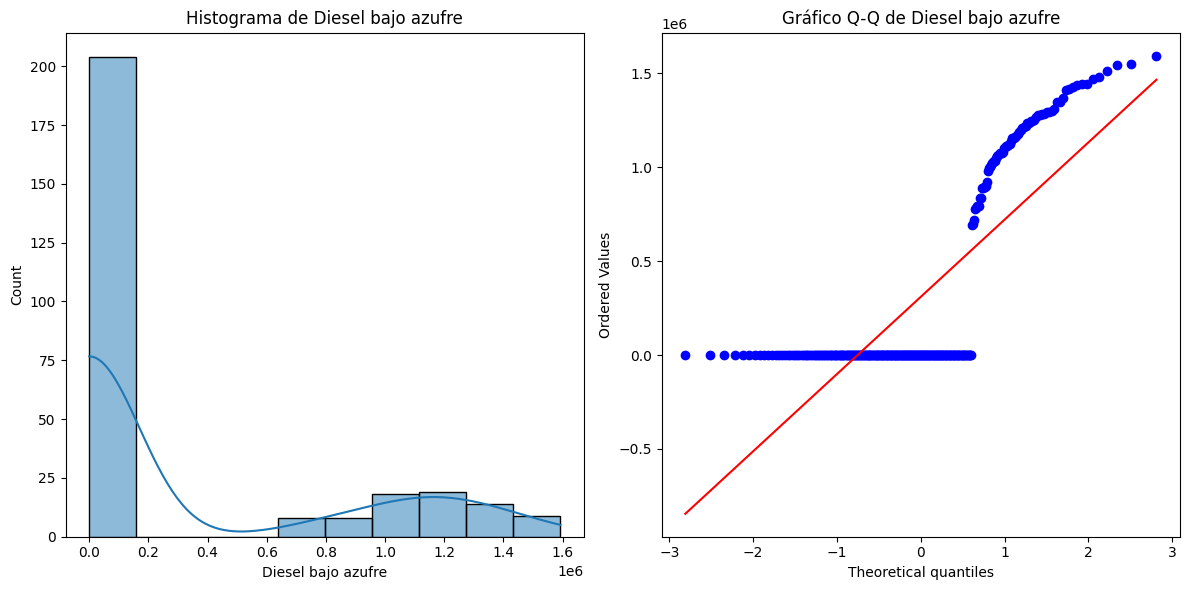

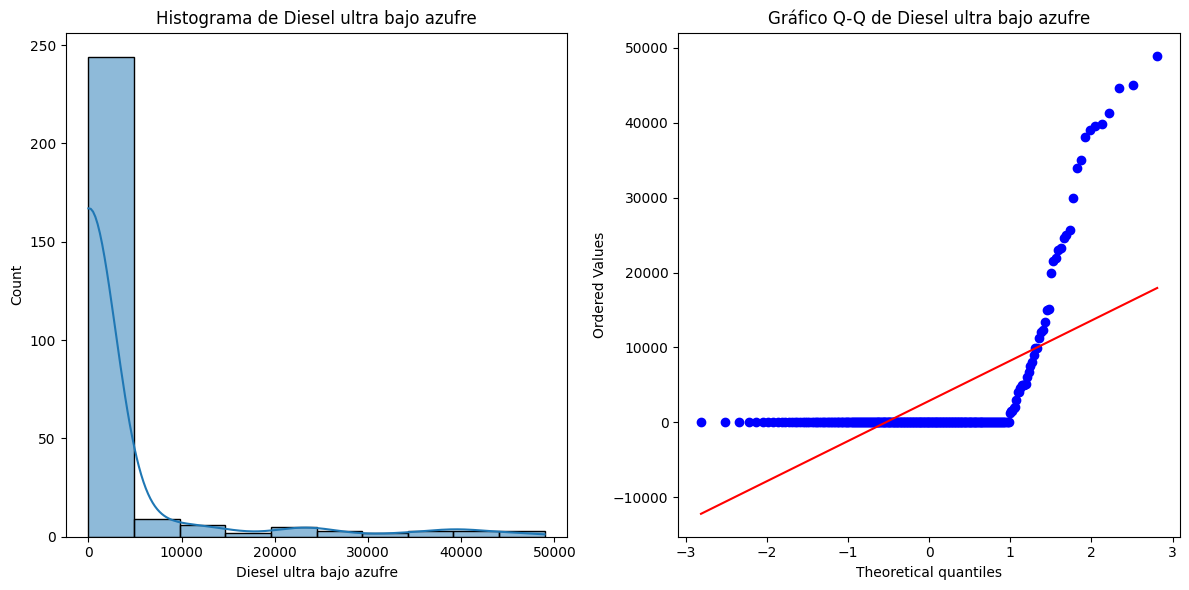

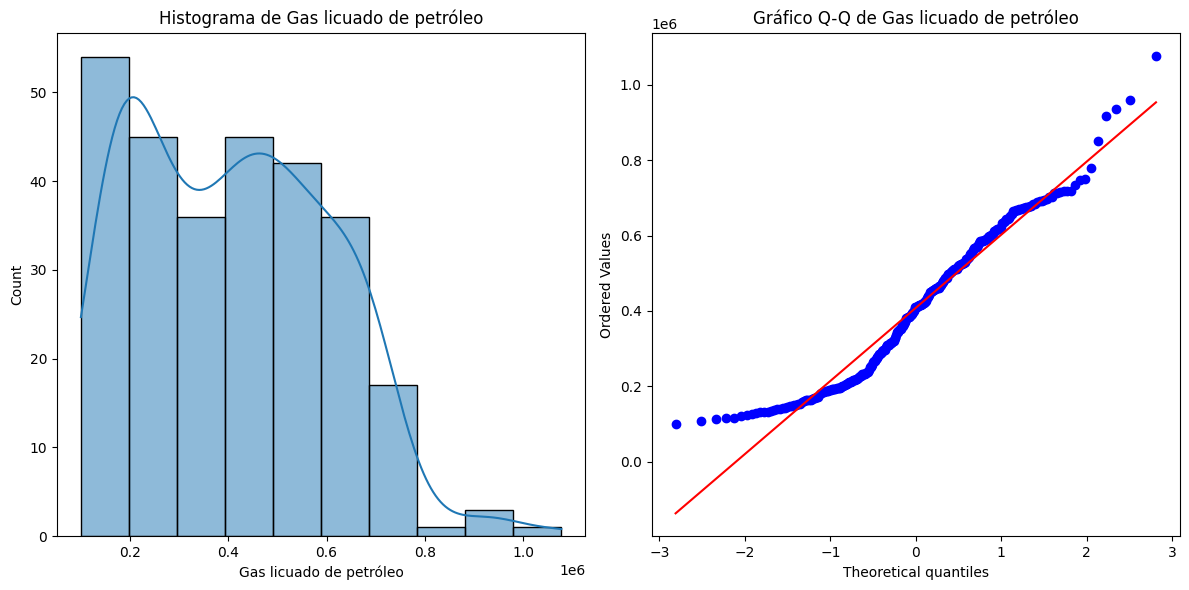

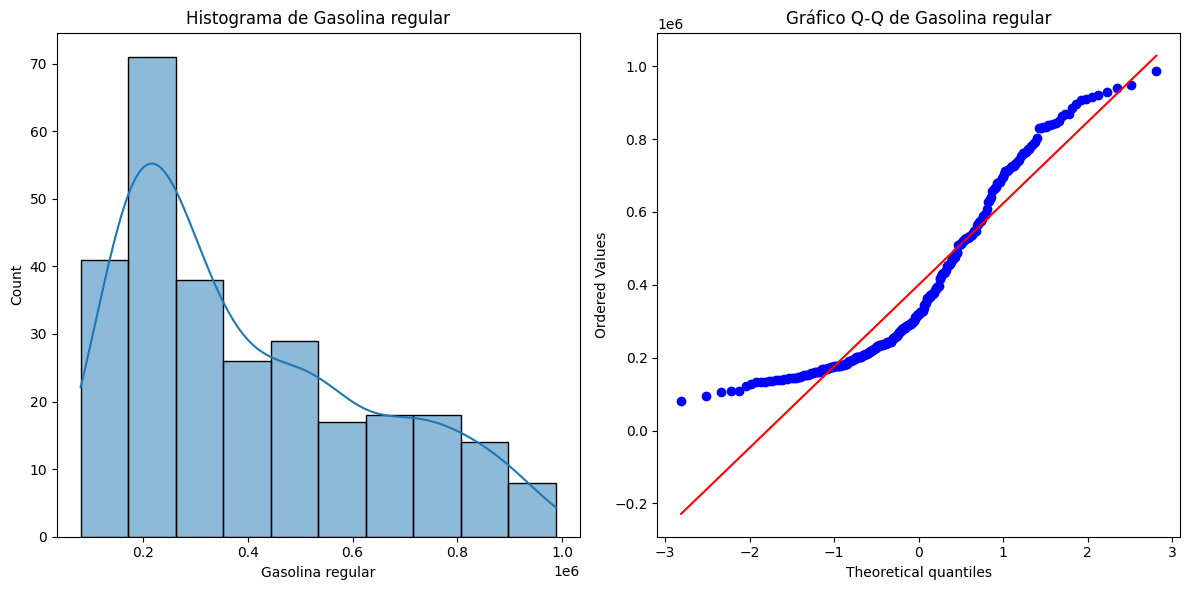

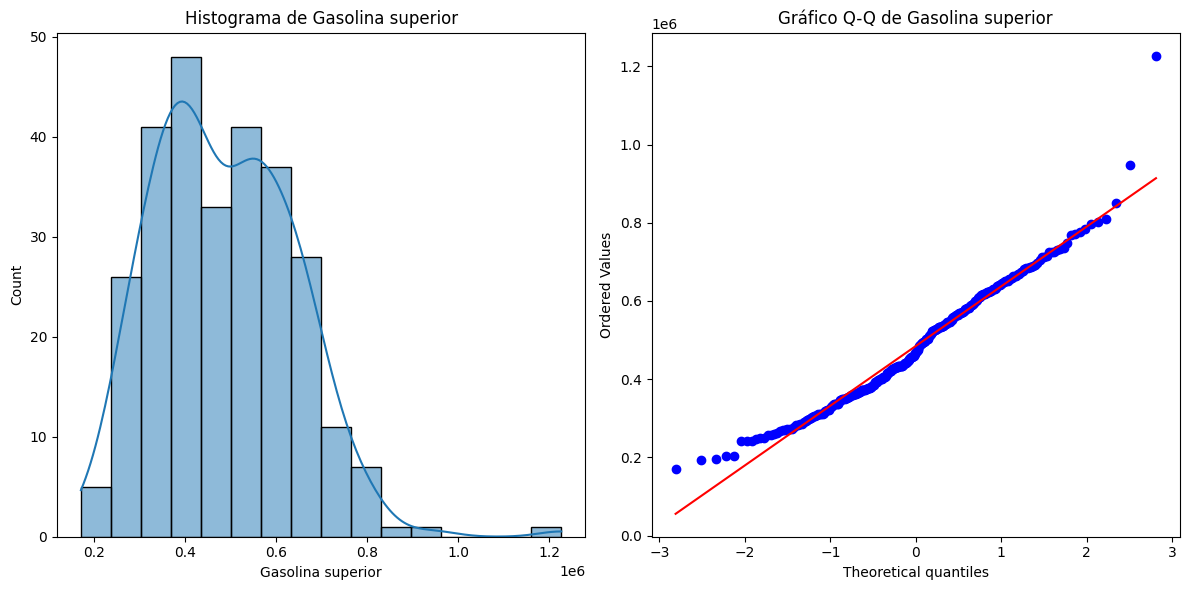

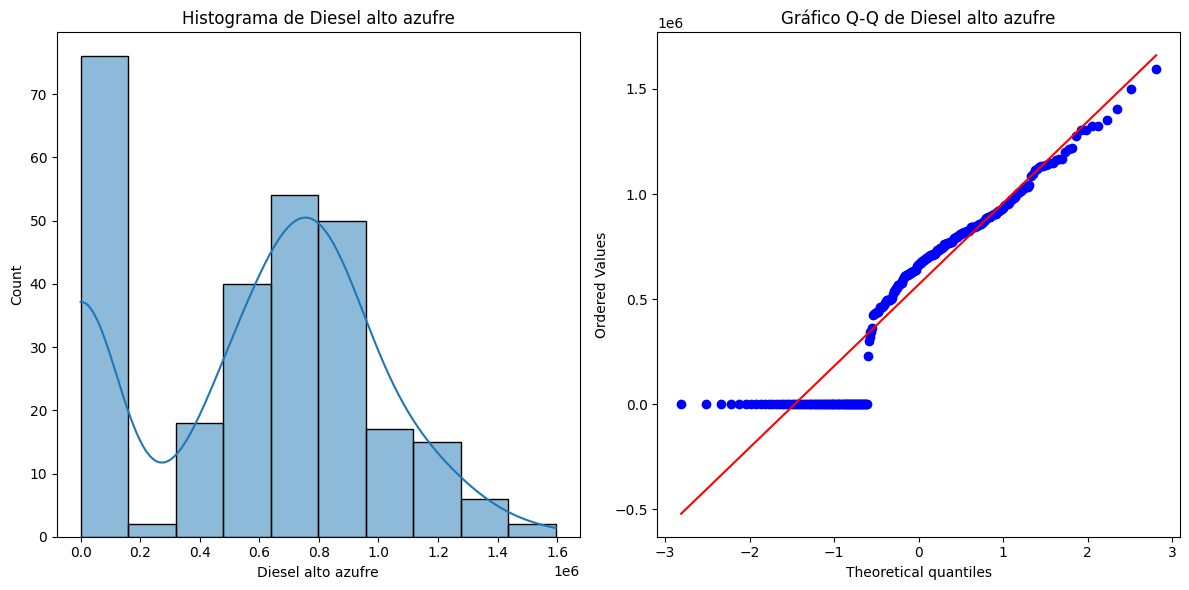

In [12]:
# Histograma y gráfico Q-Q
for column in columns_interes:
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histograma de {column}')

    # Gráfico Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {column}')

    plt.tight_layout()
    plt.show()

# Análisis de la importación por meses y años

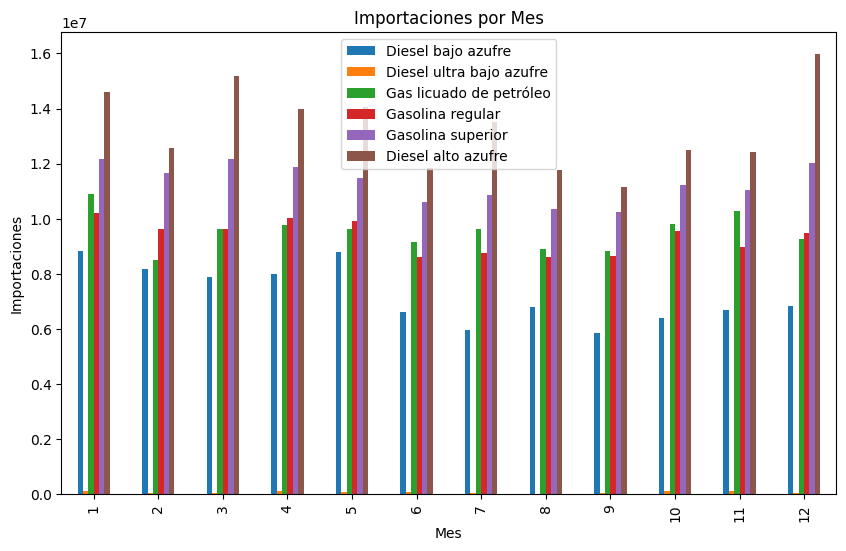

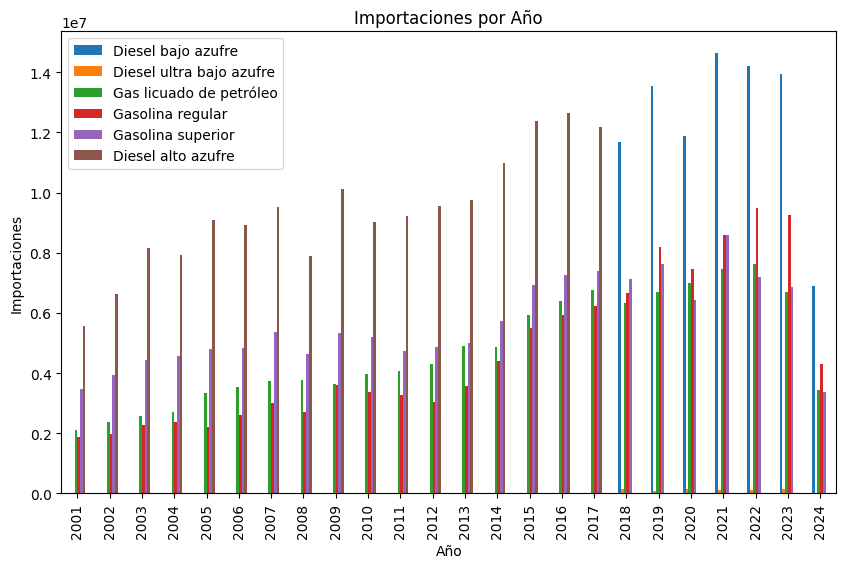

In [13]:
# Convierte la columna de fecha a datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Extrae mes y año
data['mes'] = data['Fecha'].dt.month
data['año'] = data['Fecha'].dt.year

# Suma de importaciones por mes
importaciones_por_mes = data.groupby('mes')[columns_interes].sum()

# Suma de importaciones por año
importaciones_por_año = data.groupby('año')[columns_interes].sum()

# Gráficos de barras
importaciones_por_mes.plot(kind='bar', figsize=(10, 6))
plt.title('Importaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Importaciones')
plt.show()

importaciones_por_año.plot(kind='bar', figsize=(10, 6))
plt.title('Importaciones por Año')
plt.xlabel('Año')
plt.ylabel('Importaciones')
plt.show()


# Análisis de picos en importaciones por año y tipo de combustible

In [14]:
# Encuentra los picos por año y tipo de combustible
picos_por_año = df_long.groupby(['año', 'tipo_combustible'])['importaciones'].max().unstack()

picos_por_año

tipo_combustible,Diesel alto azufre,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina regular,Gasolina superior
año,,,,,,
2001,575559.680,0.00,0.00,2.060228e+05,233643.75,373963.96
2002,703749.810,0.00,0.00,2.275959e+05,222408.00,440677.81
2003,873103.096,0.00,0.00,2.375323e+05,269981.86,459025.69
2004,809194.950,0.00,0.00,2.786885e+05,275539.38,486880.82
2005,1212610.530,0.00,0.00,4.619572e+05,266018.37,566618.55
2006,1220719.640,0.00,0.00,4.920634e+05,366193.77,711860.77
2007,1118432.250,0.00,0.00,5.532520e+05,351306.27,545587.63
2008,1095743.350,0.00,0.00,5.226705e+05,358036.44,570256.98
2009,1144960.660,0.00,0.00,5.434985e+05,588346.36,639524.61


# Comportamiento durante los últimos X años y durante la pandemia

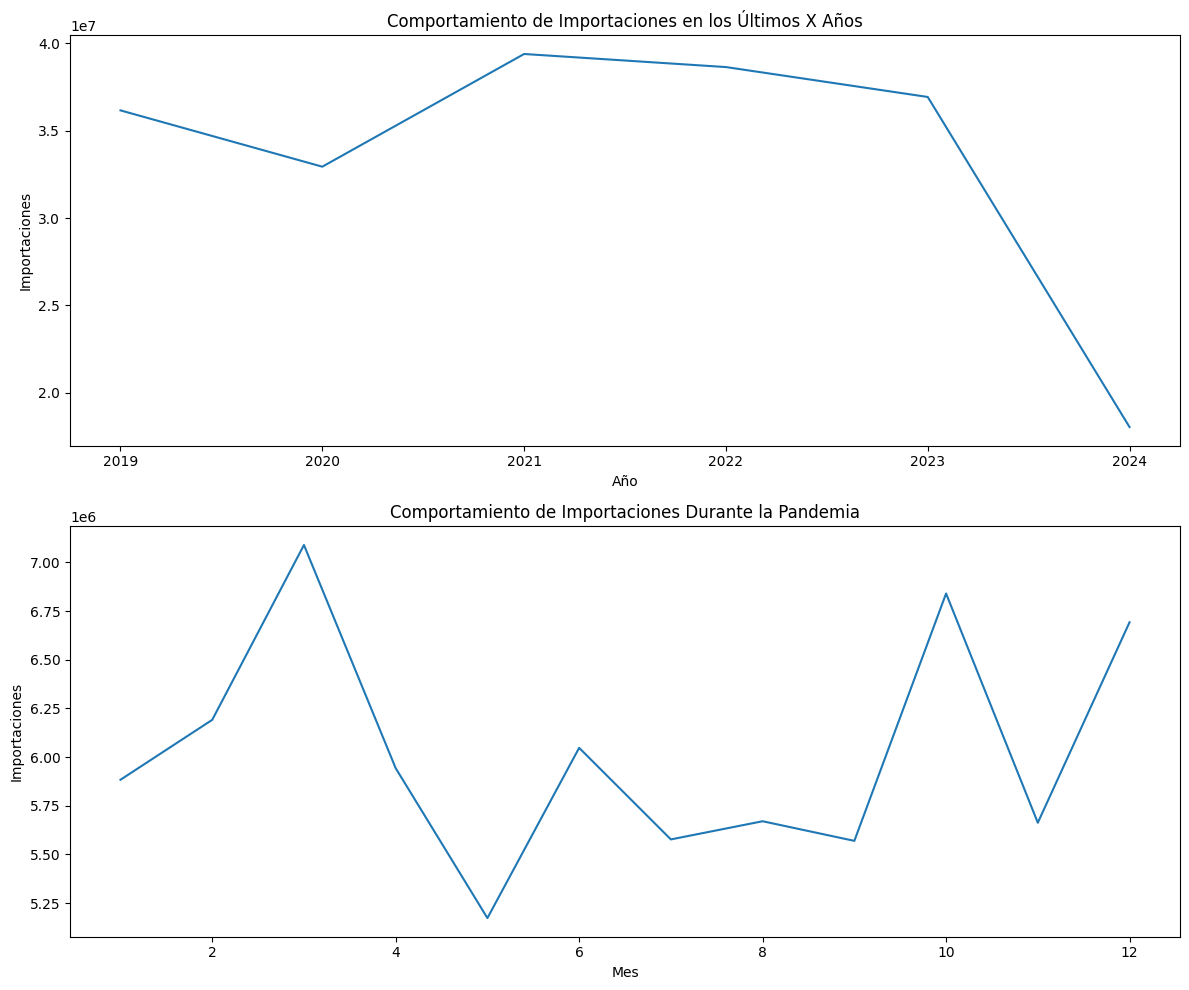

In [15]:
# Filtra los datos para los últimos X años
X = 5  # Define el número de años que quieres analizar
ultimos_x_años = df_long[df_long['año'] >= df_long['año'].max() - X]

# Comportamiento durante la pandemia (asumiendo 2020 y 2021 como años de pandemia)
pandemia = df_long[df_long['año'].isin([2020, 2021])]

# Gráficos
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Últimos X años
ultimos_x_años.groupby('año')['importaciones'].sum().plot(kind='line', ax=ax[0])
ax[0].set_title('Comportamiento de Importaciones en los Últimos X Años')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Importaciones')

# Durante la pandemia
pandemia.groupby('mes')['importaciones'].sum().plot(kind='line', ax=ax[1])
ax[1].set_title('Comportamiento de Importaciones Durante la Pandemia')
ax[1].set_xlabel('Mes')
ax[1].set_ylabel('Importaciones')

plt.tight_layout()
plt.show()


# Análisis detallado del comportamiento por tipo de combustible

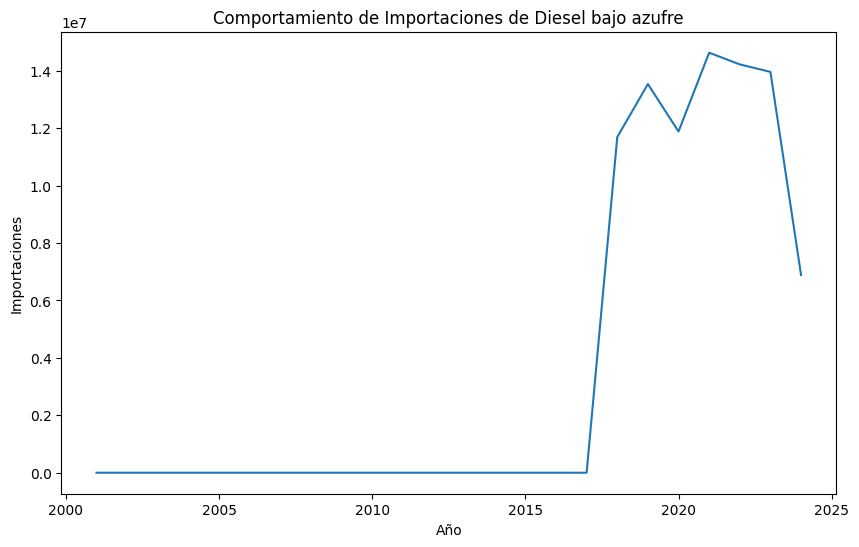

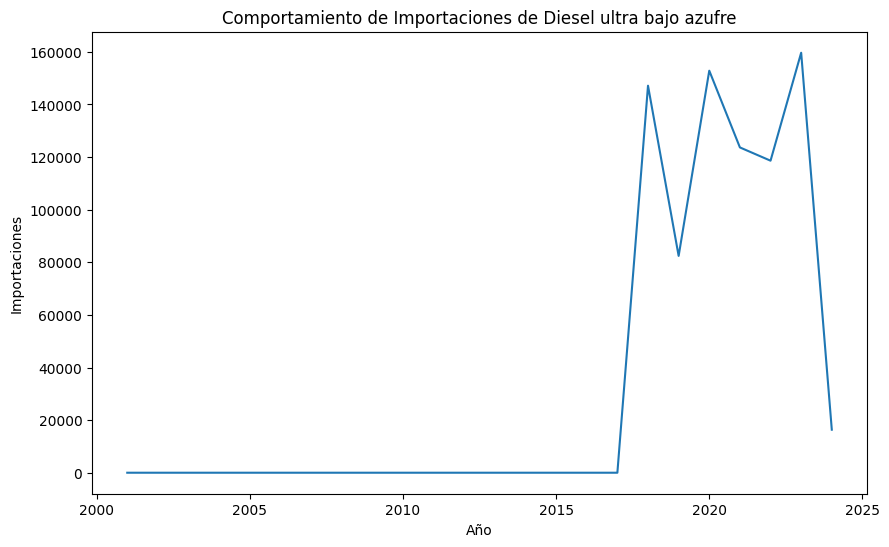

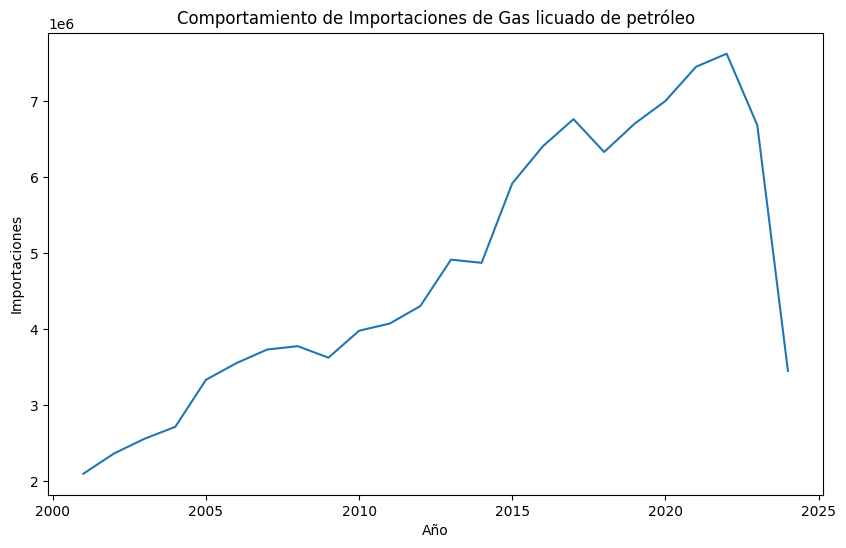

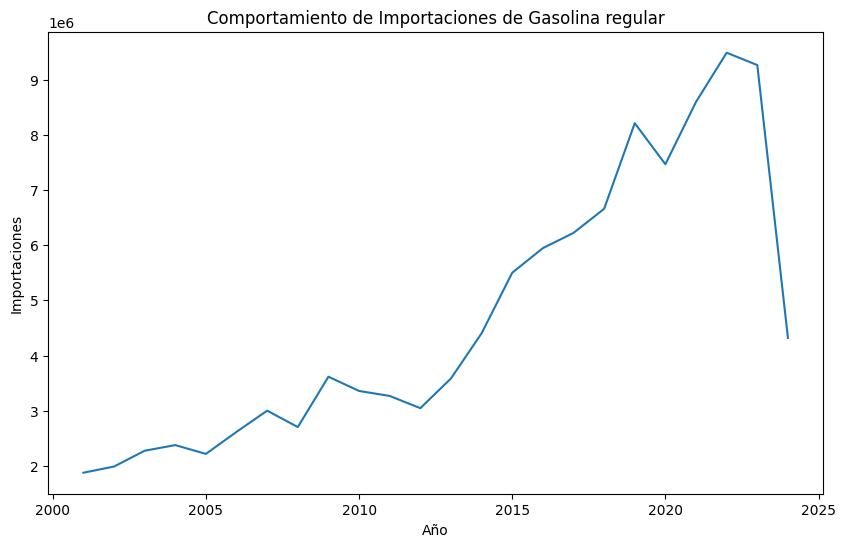

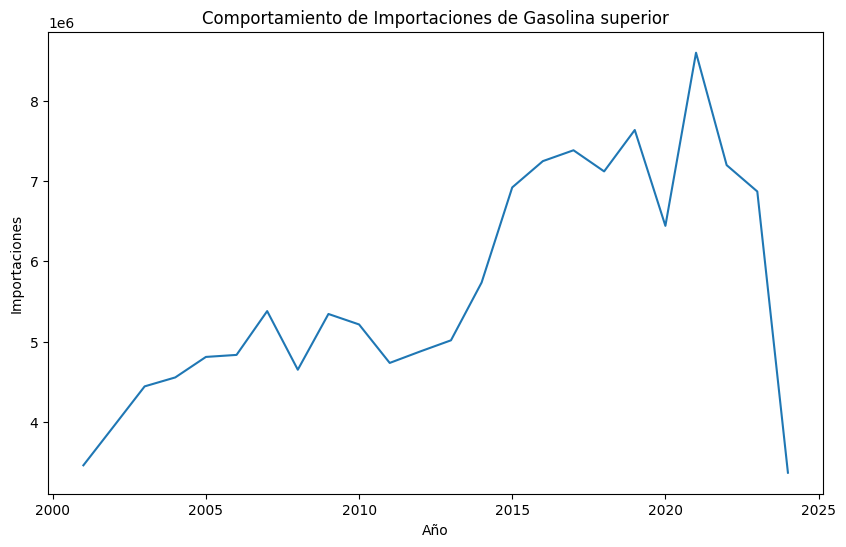

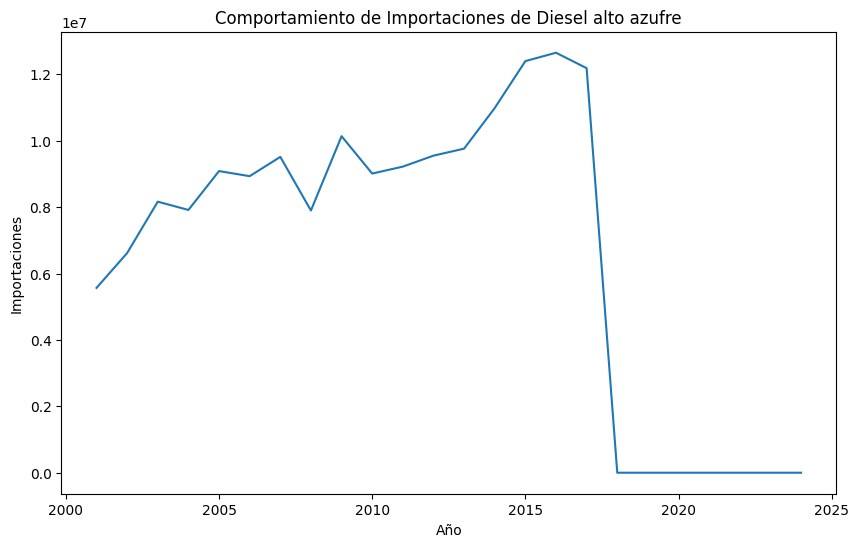

In [16]:
# Gráficos de líneas para cada tipo de combustible
for column in columns_interes:
    plt.figure(figsize=(10, 6))
    data.groupby('año')[column].sum().plot(kind='line')
    plt.title(f'Comportamiento de Importaciones de {column.capitalize()}')
    plt.xlabel('Año')
    plt.ylabel('Importaciones')
    plt.show()


# Análisis de la importación por meses y años

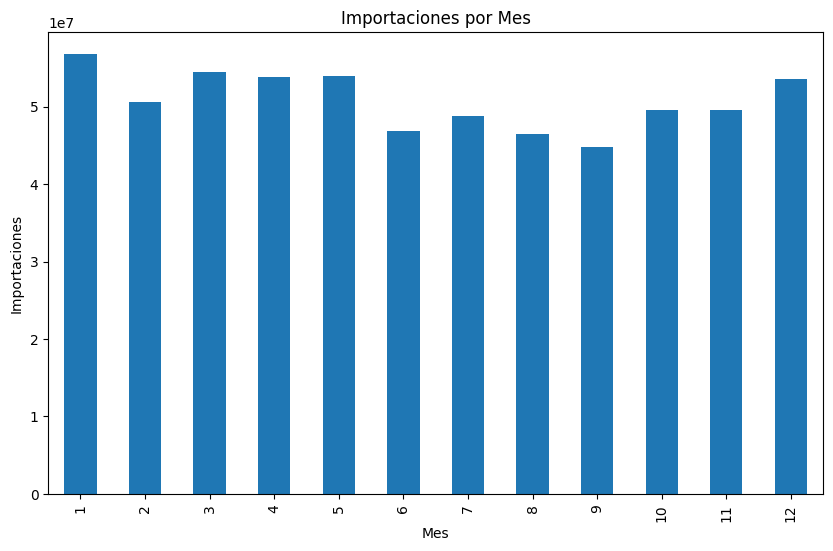

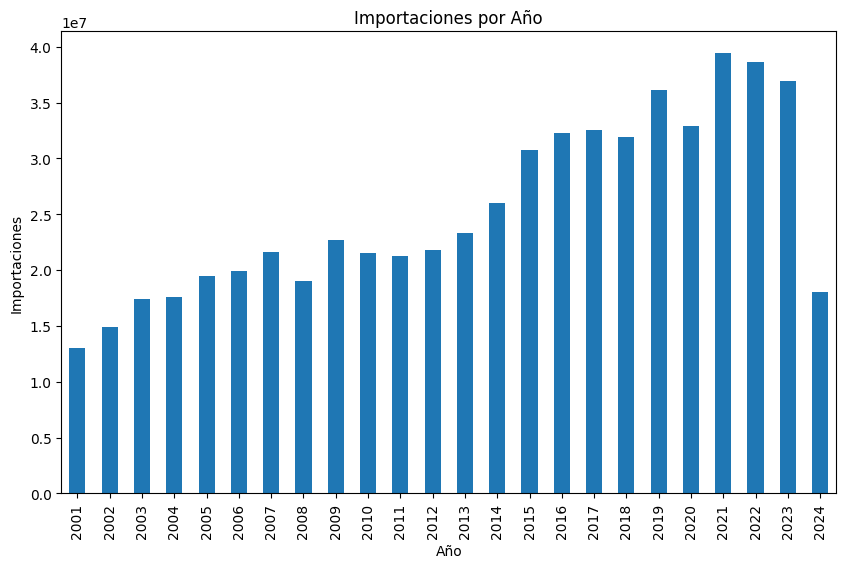

In [17]:
# Suma de importaciones por mes
importaciones_por_mes = df_long.groupby('mes')['importaciones'].sum()

# Suma de importaciones por año
importaciones_por_año = df_long.groupby('año')['importaciones'].sum()

# Gráficos de barras
importaciones_por_mes.plot(kind='bar', figsize=(10, 6))
plt.title('Importaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Importaciones')
plt.show()

importaciones_por_año.plot(kind='bar', figsize=(10, 6))
plt.title('Importaciones por Año')
plt.xlabel('Año')
plt.ylabel('Importaciones')
plt.show()


# FIN EDA

# 2 Trabajar con tres de las series proporcionadas, asegurando que al menos una de ellas esté relacionada con la estimación de precios.

In [18]:
# Cargar y preparar datos
data = pd.read_csv("depurado.csv")
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)

# Selección de series
series_consumo = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
series_importacion = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
series_precios = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]


# 3 Especificar inicio, fin y frecuencia

#### Especificar Inicio, Fin y Frecuencia:

In [19]:
# Especificar inicio, fin y frecuencia
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        inicio = serie.index.min()
        fin = serie.index.max()
        frecuencia = pd.infer_freq(serie.index)
        print(f'{nombre} de {column} - Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}')


Consumo de Gasolina superior - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Consumo de Gasolina regular - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Consumo de Diesel bajo azufre - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Consumo de Gas licuado de petróleo - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Importación de Gasolina superior - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Importación de Gasolina regular - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Importación de Diesel bajo azufre - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Importación de Gas licuado de petróleo - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Precios de Gasolina superior - Inicio: 2001-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: None
Precios de Gasolina regular - Inicio: 2001-01

#### Hacer un gráfico de la serie y explicar la información que se puede obtener a primera vista:

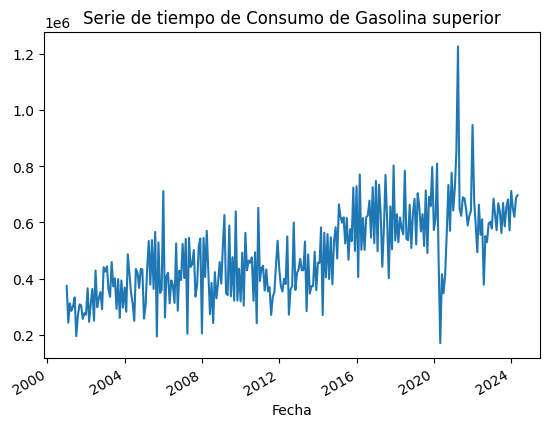

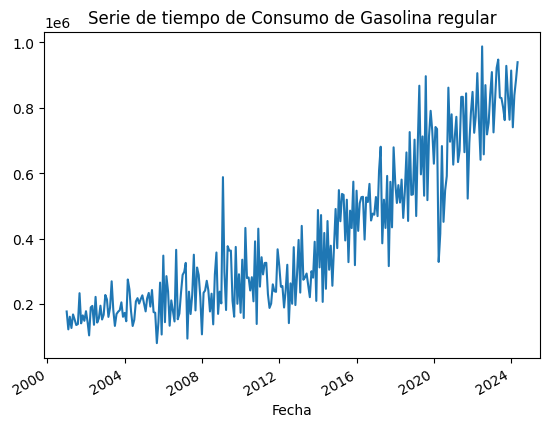

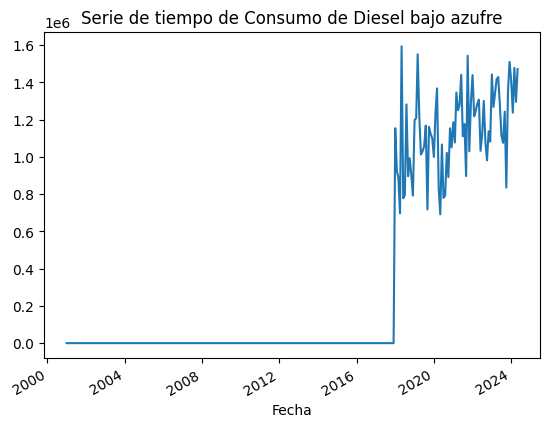

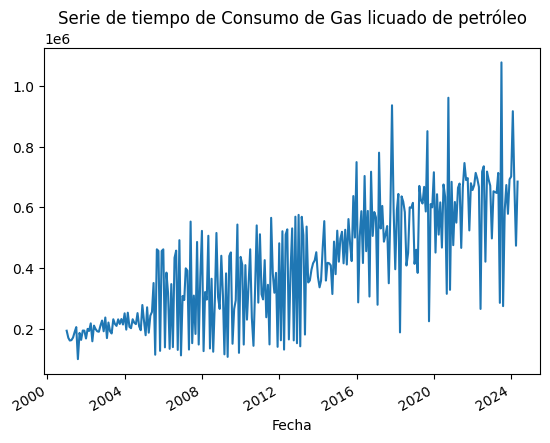

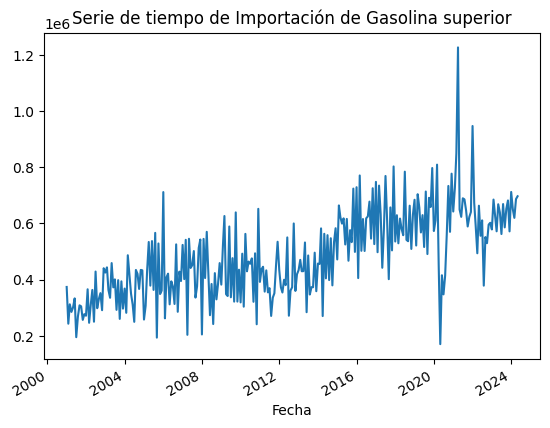

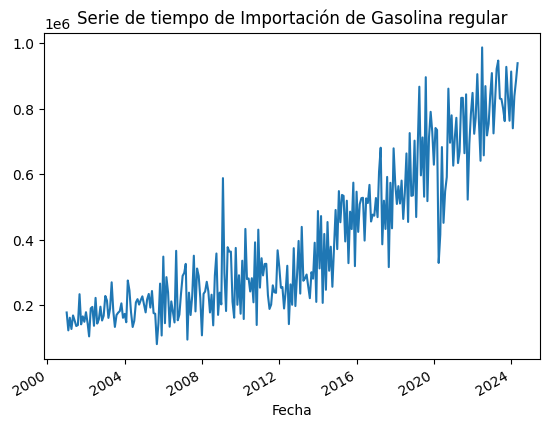

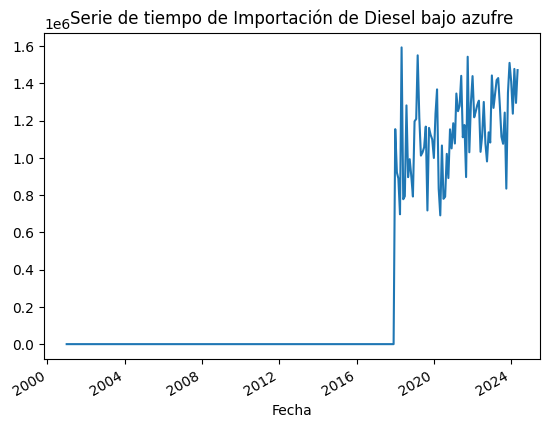

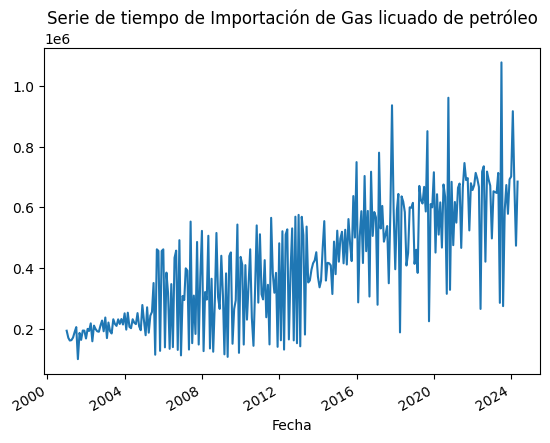

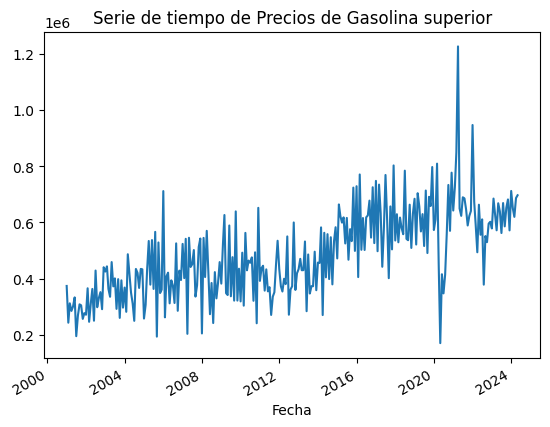

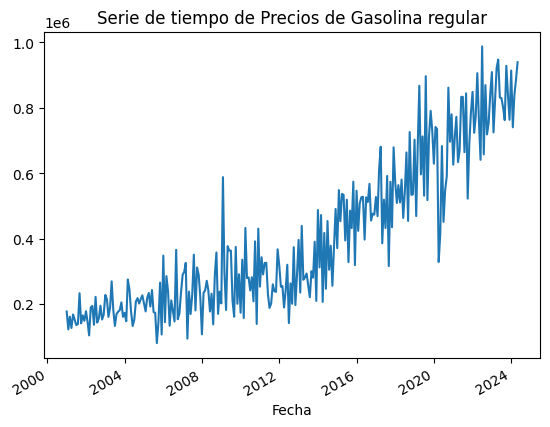

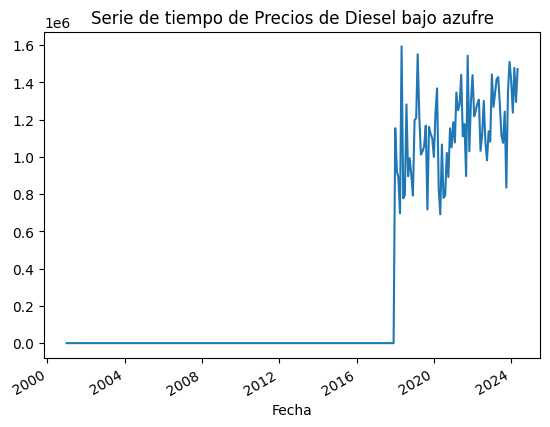

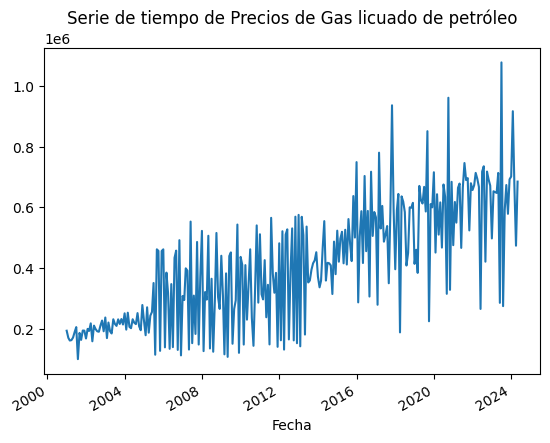

In [20]:
# Graficar las series
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        serie[column].plot(title=f"Serie de tiempo de {nombre} de {column}")
        plt.show()


#### Descomponer la serie y discutir la estacionariedad en media y varianza:

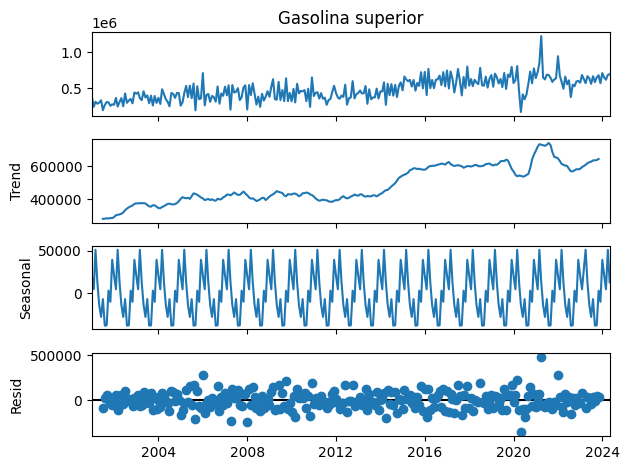

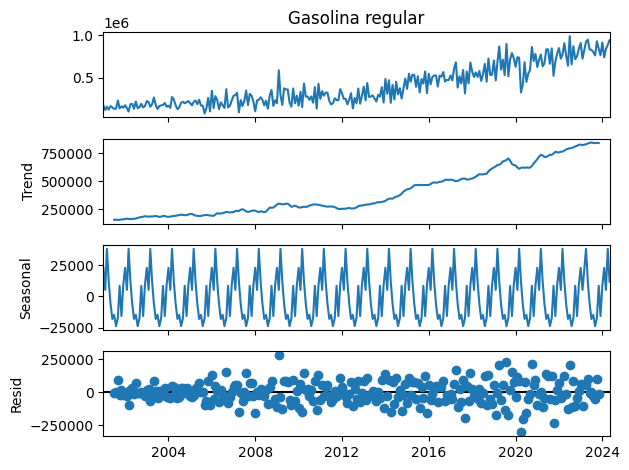

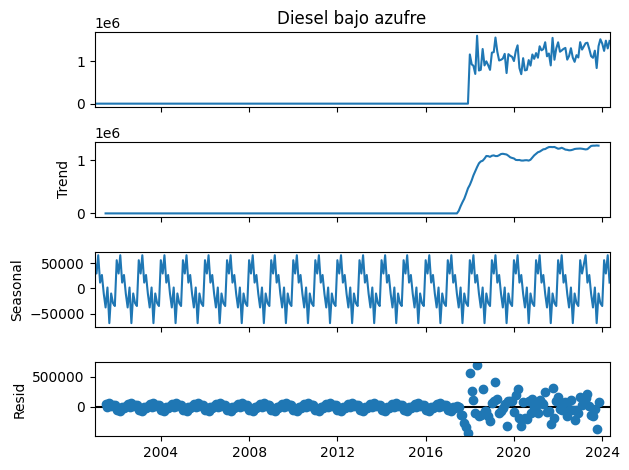

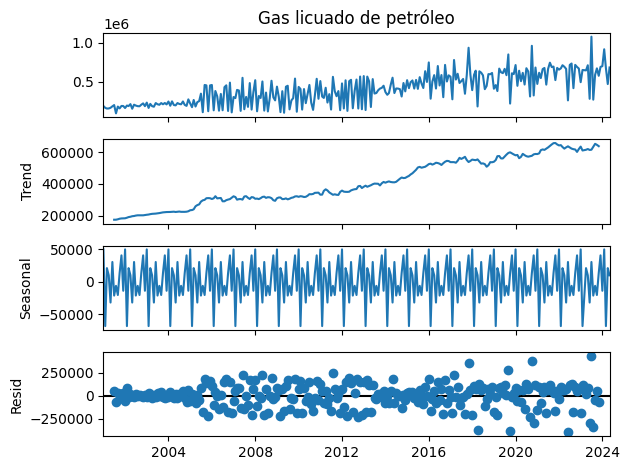

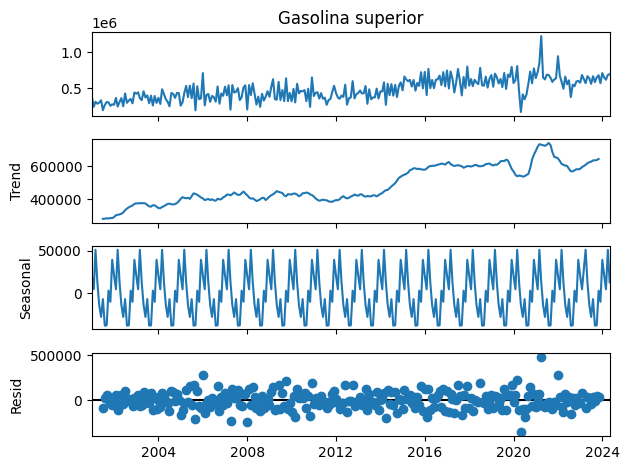

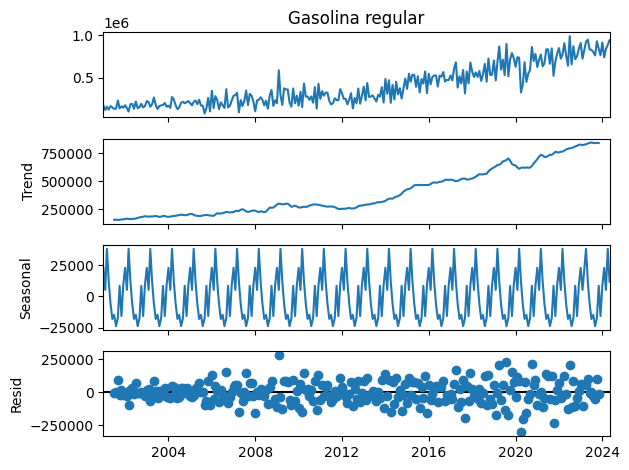

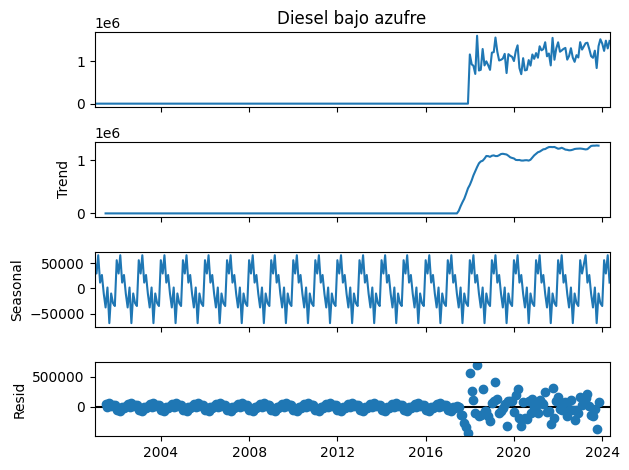

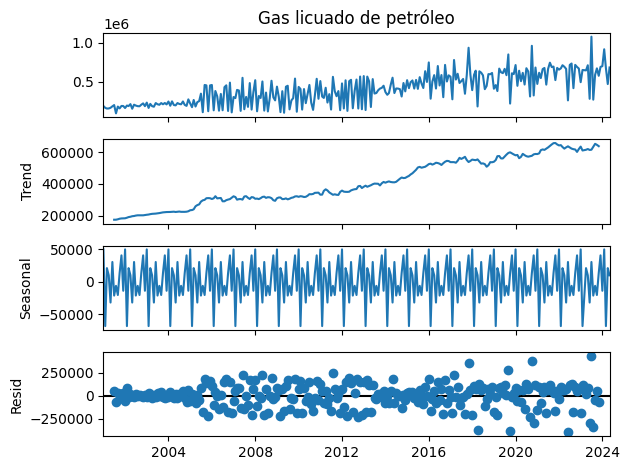

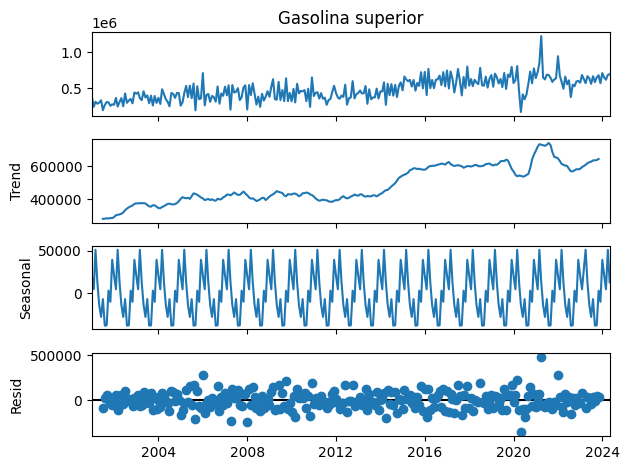

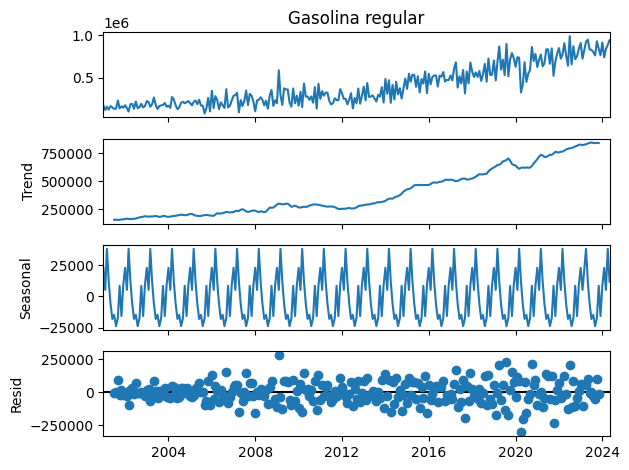

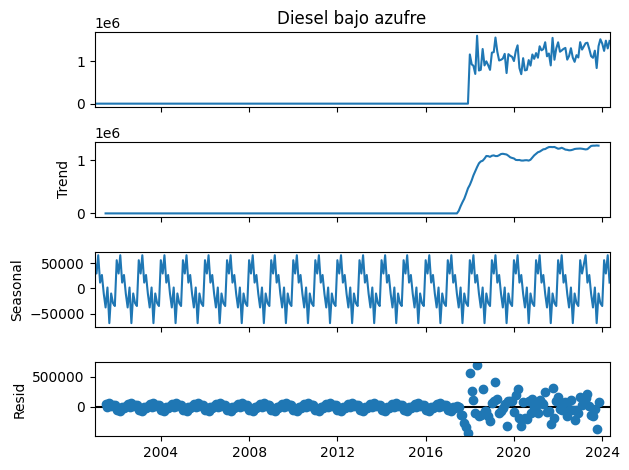

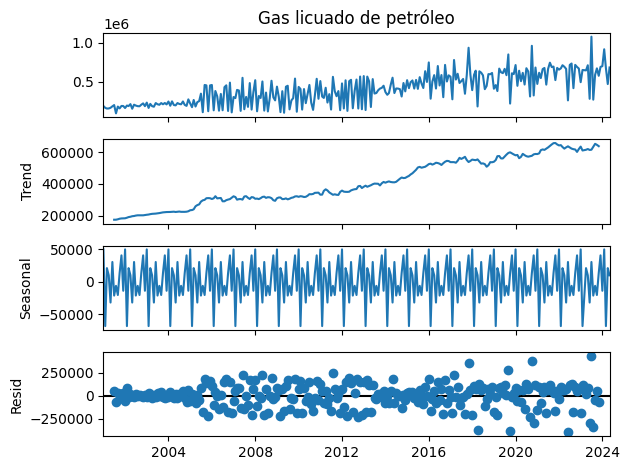

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición y estacionariedad
for serie, nombre in zip([series_consumo, series_importacion, series_precios], 
                         ['Consumo', 'Importación', 'Precios']):
    for column in serie.columns:
        result = seasonal_decompose(serie[column].dropna(), model='additive', period=12)
        result.plot()
        plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Asumiendo que tienes una columna de precios en el DataFrame
# Filtra los datos de precios
df_precios = data[['Fecha', 'año', 'mes'] + ['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre']]

# Transforma los datos a formato largo
df_precios_long = pd.melt(df_precios, id_vars=['Fecha', 'año', 'mes'], 
                          value_vars=['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre'], 
                          var_name='tipo_combustible', 
                          value_name='precio')

# Prepara los datos para la regresión
X = df_precios_long[['año', 'mes']]
y = df_precios_long['precio']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predice los precios
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Precios Reales')
plt.plot(y_pred, label='Precios Predichos')
plt.legend()
plt.title('Precios Reales vs Predichos')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.show()


KeyError: "['Fecha', 'año', 'mes'] not in index"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar y preparar datos
data = pd.read_csv("depurado.csv")
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)

# Selección de series
series_consumo = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
series_importacion = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
series_precios = data[['Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]

# Especificar inicio, fin y frecuencia
for serie in [series_consumo, series_importacion, series_precios]:
    inicio = serie.index.min()
    fin = serie.index.max()
    frecuencia = pd.infer_freq(serie.index)
    print(f'Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}')

# Gráficos de las series
for column in series_consumo.columns:
    series_consumo[column].plot(title=f"Serie de tiempo de {column}")
    plt.show()

# Descomposición y estacionariedad
for column in series_consumo.columns:
    result = seasonal_decompose(series_consumo[column].dropna(), model='additive', period=12)
    result.plot()
    plt.show()

    # Prueba de Dickey-Fuller Aumentada
    adf_result = adfuller(series_consumo[column].dropna())
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')

    # Graficar autocorrelación y autocorrelación parcial
    plot_acf(series_consumo[column].dropna())
    plt.show()

    plot_pacf(series_consumo[column].dropna())
    plt.show()

# Modelos de regresión lineal como alternativa
for column in series_consumo.columns:
    # Preparar datos
    df = series_consumo[[column]].dropna().reset_index()
    df['mes'] = df['Fecha'].dt.month
    df['año'] = df['Fecha'].dt.year
    X = df[['año', 'mes']]
    y = df[column]

    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    print(f'Error cuadrático medio para {column}: {mse}')

    # Visualizar resultados
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Valores Reales')
    plt.plot(y_pred, label='Valores Predichos')
    plt.legend()
    plt.title(f'Valores Reales vs Predichos para {column}')
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.show()

